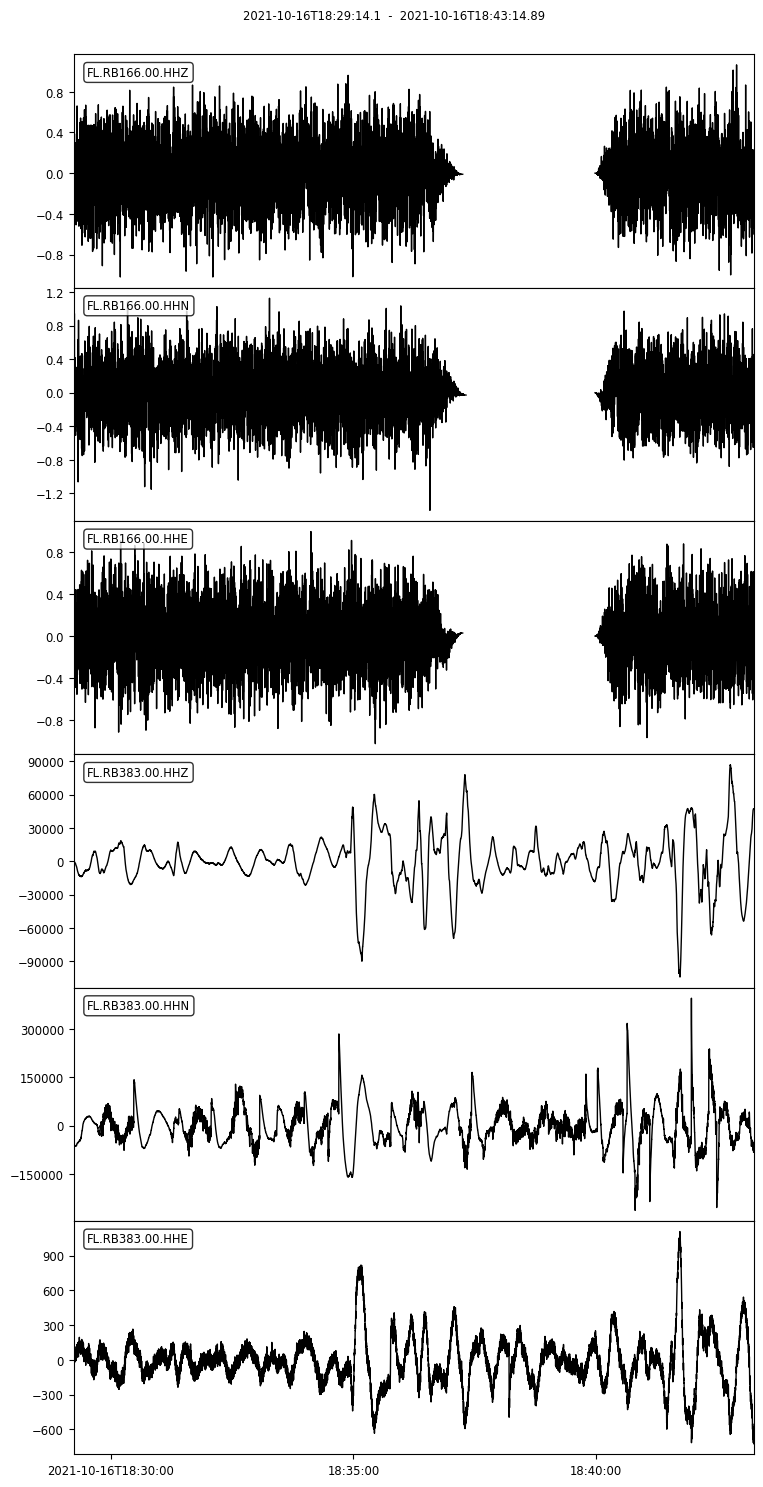

In [9]:
# Load seed files
import glob, obspy, os
TOPDIR = '/Users/thompsong/Dropbox/EarthquakeEvents'
seedfiles = glob.glob(os.path.join(TOPDIR, 'RB*.seed'))
st = obspy.core.Stream()
for seedfile in seedfiles:
    st0 = obspy.core.read(seedfile)
    for tr in st0:
        st.append(tr)
st.detrend()
taperFraction = 0.1
durationSecs = st[0].stats.delta * (st[0].stats.npts-1)
taperSecs = taperFraction * durationSecs
st.taper(taperFraction, type='hann', max_length=None, side='both')
st.filter("bandpass", freqmin=0.02, freqmax=5.0) 
startt = st[0].stats.starttime
endt = st[0].stats.endtime
st.trim(starttime=startt+taperSecs, endtime=endt-taperSecs)
st.plot(equal_scale=False);
    